# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

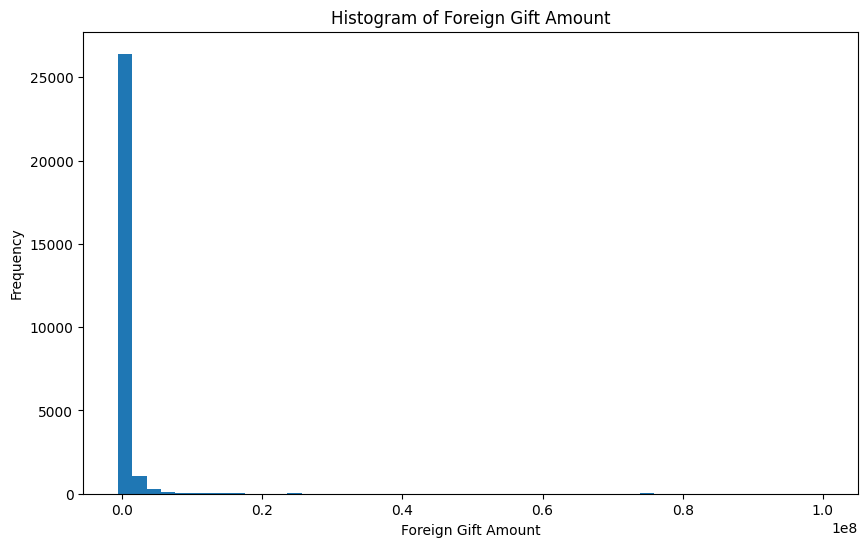

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64
Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64

Proportion of Contracts: 61.21%
Proportion of Real Estate: 0.04%
Proportion of Monetary Gifts: 38.75%


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


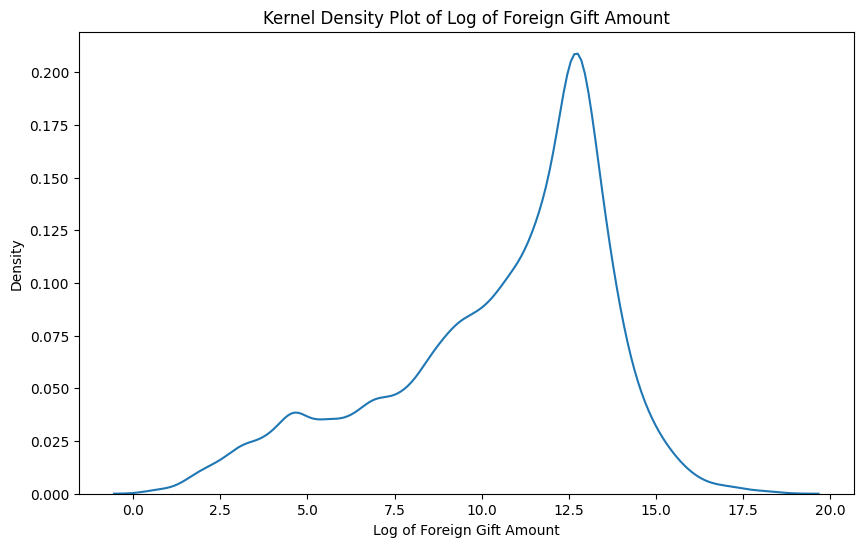

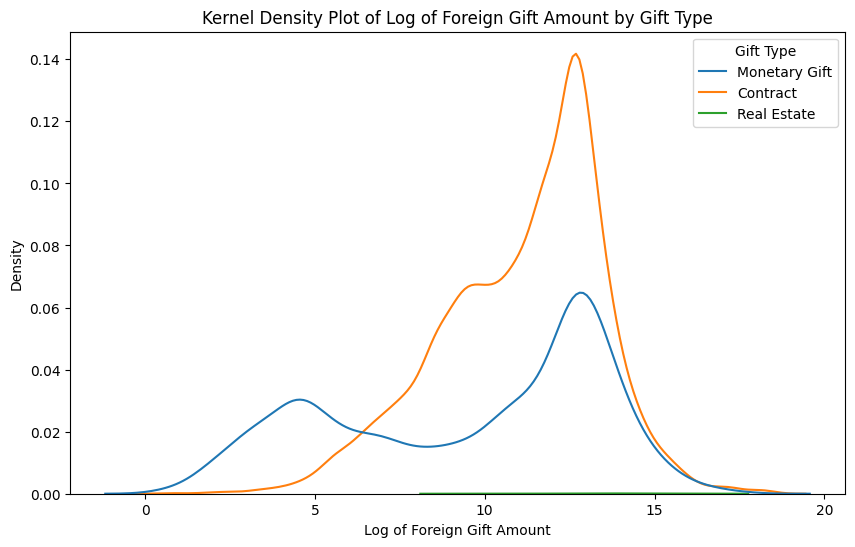


Top 15 Countries (by Number of Gifts):
 Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64

Top 15 Countries (by Total Gift Amount):
 Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUST

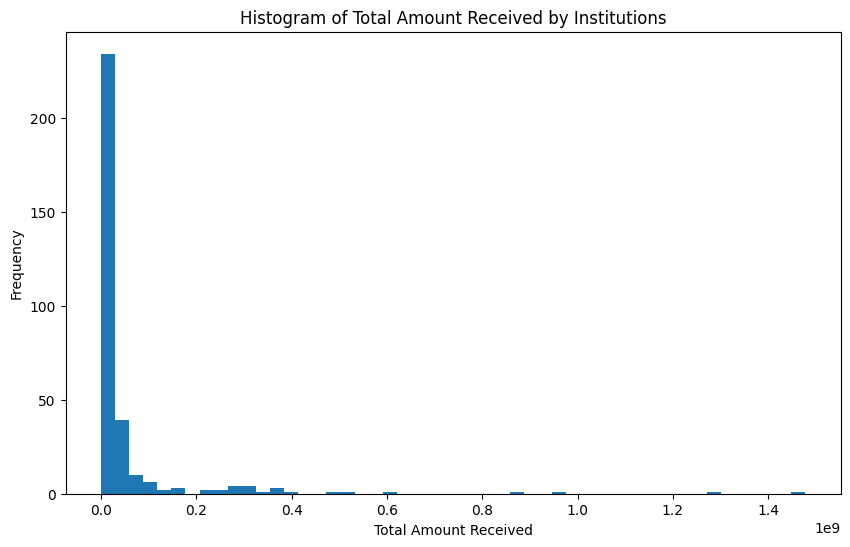


Top Giftors (by Total Gift Amount):
 Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Used colab AI for assistance with code

# Load the dataset
file_path = "/content/ForeignGifts_edu.csv"
df = pd.read_csv(file_path)

# 2. Histogram and description of Foreign Gift Amount
plt.figure(figsize=(10, 6))
plt.hist(df['Foreign Gift Amount'], bins=50)
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Foreign Gift Amount')
plt.show()

# Descriptive statistics
print(df['Foreign Gift Amount'].describe())



# 3. Gift Type analysis
gift_type_counts = df['Gift Type'].value_counts()
print(gift_type_counts)

# Calculate proportions
total_gifts = len(df)
contract_prop = gift_type_counts.get('Contract', 0) / total_gifts
real_estate_prop = gift_type_counts.get('Real Estate', 0) / total_gifts
monetary_prop = gift_type_counts.get('Monetary Gift', 0) / total_gifts

print(f"\nProportion of Contracts: {contract_prop:.2%}")
print(f"Proportion of Real Estate: {real_estate_prop:.2%}")
print(f"Proportion of Monetary Gifts: {monetary_prop:.2%}")


# 4. Kernel Density Plots
df['Log Gift Amount'] = np.log(df['Foreign Gift Amount'] + 1) #add 1 to avoid log(0) error

plt.figure(figsize=(10, 6))
sns.kdeplot(df['Log Gift Amount'])
plt.xlabel('Log of Foreign Gift Amount')
plt.title('Kernel Density Plot of Log of Foreign Gift Amount')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Log Gift Amount', hue='Gift Type')
plt.xlabel('Log of Foreign Gift Amount')
plt.title('Kernel Density Plot of Log of Foreign Gift Amount by Gift Type')
plt.show()
# Describe patterns observed


# 5. Top 15 countries
top_countries_count = df['Country of Giftor'].value_counts().head(15)
print("\nTop 15 Countries (by Number of Gifts):\n", top_countries_count)

top_countries_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("\nTop 15 Countries (by Total Gift Amount):\n", top_countries_amount)


# 6. Top 15 Institutions
top_institutions = df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("\nTop 15 Institutions (by Total Gift Amount):\n", top_institutions)

plt.figure(figsize=(10, 6))
plt.hist(df.groupby('Institution Name')['Foreign Gift Amount'].sum(), bins=50)
plt.xlabel('Total Amount Received')
plt.ylabel('Frequency')
plt.title('Histogram of Total Amount Received by Institutions')
plt.show()


# 7. Top Giftors
top_giftors = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("\nTop Giftors (by Total Gift Amount):\n", top_giftors)


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

Data Shape: (623, 10)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Month                                                                                        623 non-null    object
 1   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                 623 non-null    int64 
 2   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                623 non-null    int64 
 3   Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                   623 non-null    object
 4   Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                 623 non-null    object
 5   Crude Oil

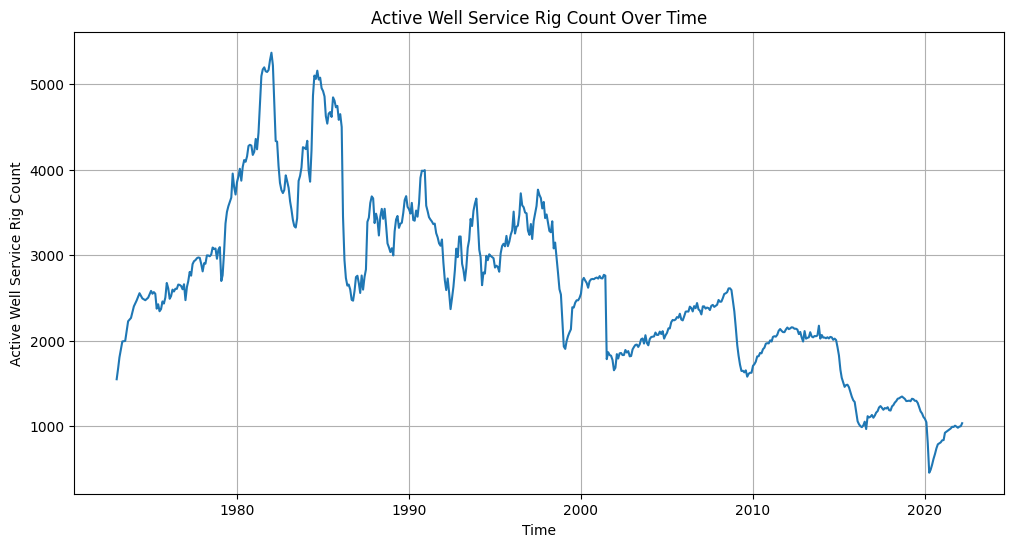

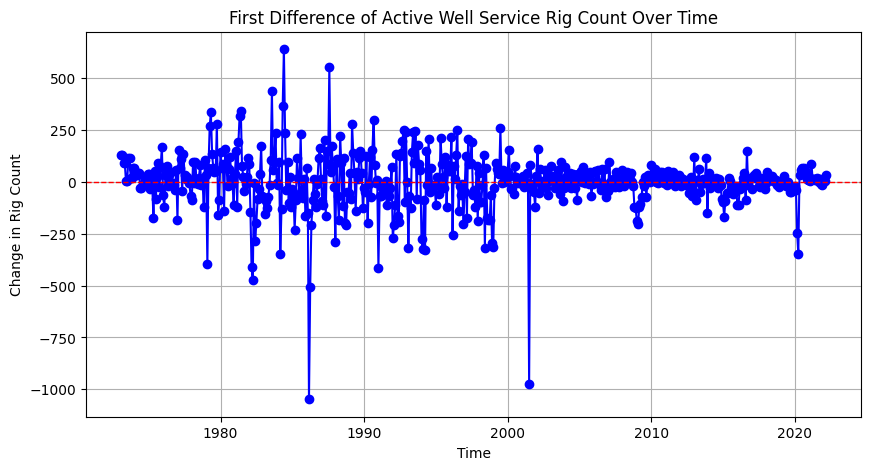

<ipython-input-10-349919d0462c>:73: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted[df.columns[0]] = pd.to_datetime(df_melted[df.columns[0]], errors='coerce')


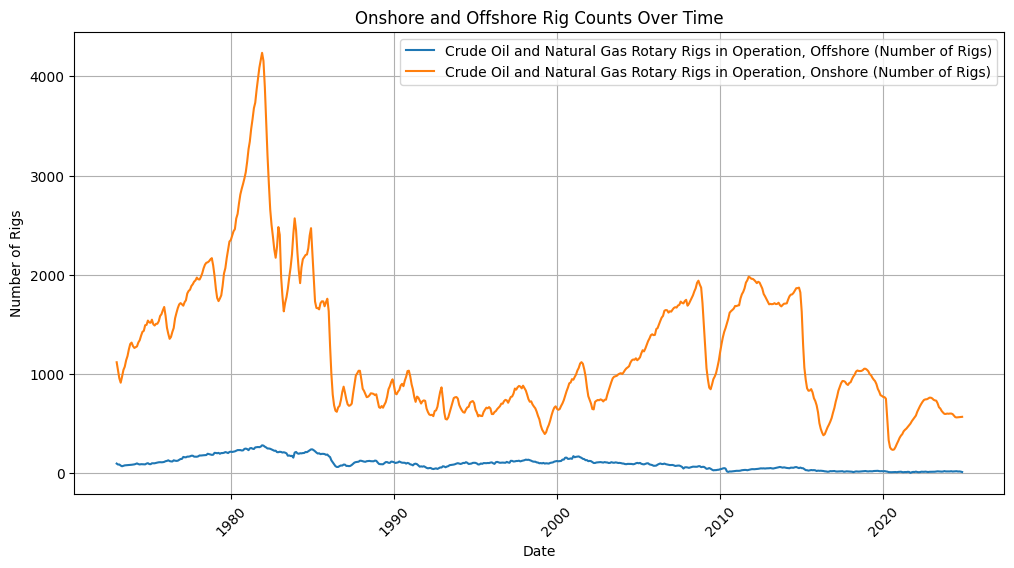

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/drilling_rigs.csv"
df = pd.read_csv(file_path)

# 1. Examine the data
print("Data Shape:", df.shape)
print("\nData Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())


# Explanation of data cleaning:
# The 'Month' column needs to be converted to datetime objects for time series analysis.
# The 'Active Well Service Rig Count' variable needs to be changed from object datatype to int64 datatype.



column_name2 = "Active Well Service Rig Count (Number of Rigs)"
df[column_name2] = pd.to_numeric(df[column_name2], errors='coerce').astype("Int64")

'Active Land Well Service Rig Count (Number of Rigs)'


# 2. Convert 'Month' to datetime
if 'Month' in df.columns:
    df['time'] = pd.to_datetime(df['Month'], format='mixed')
    df = df.sort_values(by='time')

# 3. Line plot of active rig count
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Active Well Service Rig Count (Number of Rigs)'])
plt.xlabel('Time')
plt.ylabel('Active Well Service Rig Count')
plt.title('Active Well Service Rig Count Over Time')
plt.grid(True)
plt.show()

# Description of the plot: Rig count is somewhat volatile, and has been coming down over time.


# 4. First difference and plot
if 'Active Well Service Rig Count (Number of Rigs)' in df.columns:
    df['rig_change'] = df['Active Well Service Rig Count (Number of Rigs)'].diff()

    # Plot the first difference
    plt.figure(figsize=(10, 5))
    plt.plot(df['time'], df['rig_change'], linestyle='-', marker='o', color='b')
    plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Reference line at 0
    plt.xlabel("Time")
    plt.ylabel("Change in Rig Count")
    plt.title("First Difference of Active Well Service Rig Count Over Time")
    plt.grid()
    plt.show()
else:
    print("Column 'Active Well Service Rig Count (Number of Rigs)' not found in dataset.")

# Description of the plot: There is much less drastic change in numbers of rigs between months now than there was before between


# 5. Melt and plot onshore/offshore rig counts
onshore_col = df.columns[1]
offshore_col = df.columns[2]

# Melt the DataFrame
df_melted = df.melt(id_vars=[df.columns[0]], value_vars=[onshore_col, offshore_col],
                     var_name="Rig Type", value_name="Number of Rigs")

# Convert the date column to datetime (if applicable)
df_melted[df.columns[0]] = pd.to_datetime(df_melted[df.columns[0]], errors='coerce')

# Plot the data
plt.figure(figsize=(12, 6))
for rig_type, data in df_melted.groupby("Rig Type"):
    plt.plot(data[df.columns[0]], data["Number of Rigs"], label=rig_type)

plt.xlabel("Date")
plt.ylabel("Number of Rigs")
plt.title("Onshore and Offshore Rig Counts Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()